In [11]:
# PREAMBULOS
%matplotlib inline

SEED = 1234

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from IPython.display import display, HTML
from time import time

import numpy as np
np.set_printoptions(precision=4)
np.random.seed(SEED)

import pandas as  pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 15)

pd.set_option('precision', 4)

import matplotlib.pyplot as plt

import seaborn as sns

import sklearn.ensemble
import sklearn.naive_bayes
import sklearn.svm
from sklearn.tree import DecisionTreeClassifier

import sklearn.model_selection
from scipy.stats import randint as sp_randint

/home/stella/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC

import sklearn.pipeline
from sklearn.model_selection import GridSearchCV

In [9]:
# Carga de datos
X = pd.read_csv("X.csv", index_col="index")
y = pd.read_csv("y.csv", index_col="index", dtype=int)  # Cargamos los valores booleanos (True y False)
                                                        # como números (1 y 0) para facilitar el manejo luego. 
    
X_competencia = pd.read_csv("X_competencia1.csv", index_col="index")
y_competencia_ejemplo = pd.read_csv("y_competencia_ejemplo.csv", index_col="index")
display(X)
display(y)

# Descomentar si quieren ver los datos para la competencia:
# display(X_competencia) 
# display(y_competencia_ejemplo)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
index,,,,,,,,,,,,,,,,,,,,,
0,1.491390,0.164441,1.231538,1.242870,1.557584,0.045490,0.130215,-0.434351,1.608691,-0.275786,...,1.495644,0.386186,-1.085902,-1.198301,-0.011830,1.537544,-0.772709,-0.140069,2.087113,-0.831155
1,-0.274878,0.278034,-1.310784,0.680072,-0.550258,0.635943,-0.447771,1.612193,0.523218,-0.817668,...,0.029643,0.003645,-0.682538,1.218986,-0.318957,-0.644568,-0.006130,-1.237353,-1.329079,-1.326488
2,-0.224313,-0.570958,-0.271176,-0.132801,-1.004479,0.931530,-1.450683,-1.708992,-0.448392,-2.122299,...,0.058687,-2.443076,1.984582,0.945877,0.142990,-0.198892,-0.039329,-0.586616,2.250676,1.492455
3,0.585318,-0.853202,-0.272304,-0.549254,-2.982352,-0.169744,-0.043042,-0.415619,-0.383416,0.874080,...,-2.187086,-0.379730,0.287214,1.648818,-0.736264,-0.886601,-1.271747,-0.149291,0.200660,-1.481958
4,-1.415519,1.418729,0.602669,-0.799339,0.293878,-0.179589,-0.713989,-0.148405,0.023052,0.426702,...,-1.730989,-0.470786,-0.893196,1.131444,-0.423028,-0.268517,0.304515,-1.224529,-1.942150,1.518630
5,-0.691200,-0.127675,0.142289,-0.433567,0.628837,0.344937,0.642042,-0.128452,0.673255,1.655773,...,-1.925059,-0.382387,0.240937,1.259737,0.313092,0.479246,1.332200,-0.735397,0.978559,-0.822000
6,0.934101,-0.404897,-0.349166,-1.665280,-0.525227,0.066715,0.355040,-1.233562,-0.608175,-0.383270,...,0.432890,0.674286,-0.064258,-0.944889,-1.078897,-0.801034,0.269001,-1.709661,0.382265,0.537923
7,0.741762,0.847339,-1.275101,-1.184877,-0.369747,-0.378966,-1.348889,-0.776579,-0.312644,-0.306435,...,-1.693454,0.532657,-1.613731,1.625088,-0.476602,-1.179684,0.232037,1.838190,-0.704720,0.876326
8,-1.173525,-0.136488,0.338063,-0.162307,-1.303650,0.847927,-0.471892,-0.403960,-0.808899,-1.956698,...,0.488654,0.399122,1.839348,0.605970,-1.287595,0.019271,-0.132577,0.957579,1.284221,-0.678374


,output
index,
0,0
1,0
2,0
3,0
4,1
5,1
6,0
7,0
8,1


In [12]:
# EJERCICIO 1. 

np.random.seed(1234)

X_dev, X_eval, y_dev, y_eval = sklearn.model_selection.train_test_split(X, y, test_size=0.2, stratify = y)

# Objetivo: variables X_dev, X_eval, y_dev e y_eval asignadas
#########################################################

In [13]:
print("X_dev: {}, y_dev: {} para desarrollo".format(X_dev.shape, y_dev.shape))
print("X_eval: {}, y_eval: {} para evaluación".format(X_eval.shape, y_eval.shape))

X_dev: (400, 200), y_dev: (400, 1) para desarrollo
X_eval: (100, 200), y_eval: (100, 1) para evaluación


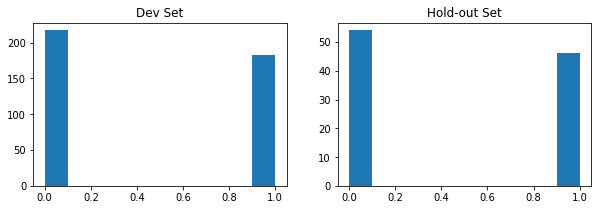

In [6]:
plt.figure(figsize=(10, 3))
plt.subplot(1,2,1)
plt.hist(np.array(y_dev))  # muestra un histograma para la distribución de y.
plt.title('Dev Set')
plt.subplot(1,2,2)
plt.hist(np.array(y_eval))  # muestra un histograma para la distribución de y.
plt.title('Hold-out Set')
plt.show()

#### ejercicio 2

Entrenar un árbol de decisión con altura máxima 3 y el resto de los hiperparámetros en default.

In [6]:
arbol_2_1 = DecisionTreeClassifier(max_depth=3)
arbol_2_1.fit(X_dev, y_dev)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [9]:
from sklearn.metrics import roc_curve

In [10]:
y_pred_proba = arbol_2_1.predict_proba(X_eval)[:,1]

In [11]:
fpr, tpr, thresholds = roc_curve(y_eval, y_pred_proba)

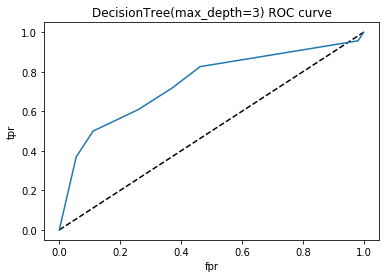

In [12]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ROC')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('DecisionTree(max_depth=3) ROC curve')
plt.show()

Estimar la performance del modelo utilizando K-fold cross validation con K = 5, con las métricas “Accuracy” y “ROC AUC”. Para ello, se pide medir la performance en cada partición tanto sobre el fold de validación como sobre los folds de entrenamiento. Luego, completar la primera tabla.


,Accuracy (training),Accuracy (validación),AUC ROC (training),AUC ROC (validación)
Permutación,,,,
1,0.8245,0.6296,0.8200,0.6204
2,0.8464,0.7407,0.8418,0.7377
3,0.8406,0.6875,0.8325,0.6697
4,0.8255,0.6962,0.8248,0.6983
5,0.8442,0.6835,0.8421,0.6822


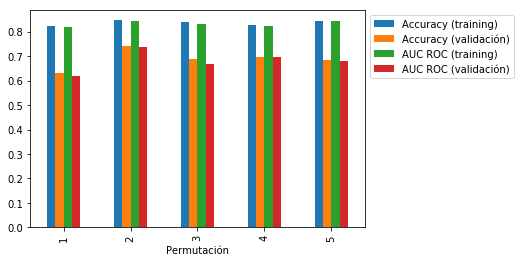

In [7]:
accuracies_training = []
accuracies_validation = []
aucs_training = []
aucs_validation = []

np.random.seed(SEED) # esto lo agregue para fijar el random state

# Puede serles de utilidad tener a X_dev e y_dev como matrices de numpy directamente:
X_dev_np = np.array(X_dev)
y_dev_np = np.array(y_dev).ravel()

########################################################
## AQUI VA SU CODIGO 
cv = sklearn.model_selection.StratifiedKFold(n_splits=5)
splits = cv.split(X_dev, y_dev)
#scores = pd.DataFrame(columns=['accuracies_training','accuracies_validation','aucs_training','aucs_validation'])
for train_idxs, val_idxs in splits:
    arbol_2_2 = DecisionTreeClassifier(max_depth=3)
    arbol_2_2.fit(X_dev.iloc[train_idxs], y_dev.iloc[train_idxs])
    y_train = y_dev.iloc[train_idxs]
    y_val = y_dev.iloc[val_idxs]
    y_train_pred = arbol_2_2.predict(X_dev.iloc[train_idxs])
    y_val_pred = arbol_2_2.predict(X_dev.iloc[val_idxs])
#    scores = scores.append(pd.Series({
#        'accuracies_training': sklearn.metrics.accuracy_score(y_train, y_train_pred),
#        'accuracies_validation': sklearn.metrics.accuracy_score(y_val, y_val_pred),
#        'aucs_training': sklearn.metrics.roc_auc_score(y_train, y_train_pred),
#        'aucs_validation': sklearn.metrics.roc_auc_score(y_val, y_val_pred)
#     }), ignore_index=True)
    accuracies_training.append(sklearn.metrics.accuracy_score(y_train, y_train_pred))
    accuracies_validation.append(sklearn.metrics.accuracy_score(y_val, y_val_pred))
    aucs_training.append(sklearn.metrics.roc_auc_score(y_train, y_train_pred))
    aucs_validation.append(sklearn.metrics.roc_auc_score(y_val, y_val_pred))
## Objetivo: accuracies_training, accuracies_validation, aucs_training y aucs_validation asignados
#########################################################

df = pd.DataFrame(index=range(1,6))
df.index.name = "Permutación"
                  
df["Accuracy (training)"] = accuracies_training     # cambiar por accuracies_training
df["Accuracy (validación)"] = accuracies_validation   # cambiar por accuracies_validation
df["AUC ROC (training)"] = aucs_training      # cambiar por aucs_training
df["AUC ROC (validación)"] = aucs_validation    # cambiar por aucs_validation


display(HTML("<h3> TABLA 1 </h3>"))
display(df)

# Descomentar las siguientes líneas para graficar el resultado
df.plot(kind="bar")
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()

In [13]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_eval,y_pred_proba)

0.7419484702093398

Entrenar árboles de decisión para cada una de las siguientes combinaciones y completar la segunda tabla.


In [14]:
resultados_training = []
resultados_validation = []

########################################################
## AQUI VA SU CODIGO 
## Objetivo: resultados_training y resultados_validation asignadas
#
## Recomendamos seguir el siguiente esquema:
np.random.seed(SEED)
for criterio in ["gini", "entropy"]:
    for altura in [3, 5, None]:
#         CODIGO AQUI.
        arbol_2_3 = DecisionTreeClassifier(max_depth=altura, criterion=criterio)
        arbol_2_3.fit(X_dev, y_dev)    
        y_dev_pred = arbol_2_3.predict(X_dev)
        y_eval_pred = arbol_2_3.predict(X_eval)
        resultados_training.append(sklearn.metrics.roc_auc_score(y_dev, y_dev_pred))
        resultados_validation.append(sklearn.metrics.roc_auc_score(y_eval, y_eval_pred))
#########################################################

df = pd.DataFrame(index=range(0,6))

df["Altura máxima"] = [3, 5, "Inifinito"] * 2
df["Criterio de evaluación de corte"] = ["Gini"] * 3 + ["Ganancia de Información"] * 3
df["AUC ROC promedio (training)"] = resultados_training # reemplazar por resultados_training
df["AUC ROC promedio (validación)"] = resultados_validation # reemplazar por resultados_validation

   
display(HTML("<h3> TABLA 2 </h3>"))
display(df)

,Altura máxima,Criterio de evaluación de corte,AUC ROC promedio (training),AUC ROC promedio (validación)
0,3,Gini,0.8068,0.6965
1,5,Gini,0.9473,0.6610
2,Inifinito,Gini,1.0000,0.6888
3,3,Ganancia de Información,0.7882,0.6795
4,5,Ganancia de Información,0.9121,0.5946
5,Inifinito,Ganancia de Información,1.0000,0.6425


*EJERCICIO EXTRA: Usar la implementación de árboles de decisión que realizaron para la guía de ejercicios de la materia. Adaptarla para que cumpla con la interfaz requerida por sklearn, asegurarse de que funcione con variables continuas y reproducir las tablas anteriores. *



## Implementacion de mi arbol

In [1]:
import numpy as np
import pandas as pd

from collections import Counter
from __future__ import division

In [2]:
def construir_arbol(instancias, etiquetas,nmax=999999,nlevel=0):
    # ALGORITMO RECURSIVO para construcción de un árbol de decisión binario. 
    # Suponemos que estamos parados en la raiz del árbol y tenemos que decidir cómo construirlo. 
    nlevel = nlevel + 1
    ganancia, pregunta = encontrar_mejor_atributo_y_corte(instancias, etiquetas) 
    print "Mejor pregunta "
    print(pregunta)
    # Criterio de corte: ¿Hay ganancia?
    if ganancia == 0 or nmax == nlevel :
        #  Si no hay ganancia en separar, no separamos. 
        return Hoja(etiquetas)
    else: 
        # Si hay ganancia en partir el conjunto en 2
        instancias_cumplen, etiquetas_cumplen, instancias_no_cumplen, etiquetas_no_cumplen = partir_segun(pregunta, instancias, etiquetas)
        print ("partio el arbol")
        # partir devuelve instancias y etiquetas que caen en cada rama (izquierda y derecha)

        # Paso recursivo (consultar con el computador más cercano)
        sub_arbol_izquierdo = construir_arbol(instancias_cumplen, etiquetas_cumplen,nmax,nlevel)
        print "arbol_izq"
        sub_arbol_derecho   = construir_arbol(instancias_no_cumplen, etiquetas_no_cumplen,nmax,nlevel)
        print "arbol_derecho"
        # los pasos anteriores crean todo lo que necesitemos de sub-árbol izquierdo y sub-árbol derecho
        
        # sólo falta conectarlos con un nodo de decisión:
        return Nodo_De_Decision(pregunta, sub_arbol_izquierdo, sub_arbol_derecho)

In [3]:
# Definición de la estructura del árbol. 

class Hoja:
    #  Contiene las cuentas para cada clase (en forma de diccionario)
    #  Por ejemplo, {'Si': 1, 'No': 2}
    def __init__(self, etiquetas):
        self.cuentas = dict(Counter(etiquetas))


class Nodo_De_Decision:
    # Un Nodo de Decisión contiene preguntas y una referencia al sub-árbol izquierdo y al sub-árbol derecho
     
    def __init__(self, pregunta, sub_arbol_izquierdo, sub_arbol_derecho):
        self.pregunta = pregunta
        self.sub_arbol_izquierdo = sub_arbol_izquierdo
        self.sub_arbol_derecho = sub_arbol_derecho
        
        
# Definición de la clase "Pregunta"
class Pregunta:
    def __init__(self, atributo, valor):
        self.atributo = atributo
        self.valor = valor
    
    def cumple(self, instancia):
        # Devuelve verdadero si la instancia cumple con la pregunta
        return instancia[self.atributo] == self.valor ## OJOOOOOO
    
    def __repr__(self):
        return "¿Es el valor para {} igual a {}?".format(self.atributo, self.valor)
    

In [4]:
def gini(etiquetas):
    impureza = 0
    # COMPLETAR
    # gini inicial
    pr_pos = etiquetas.count('Si') / len(etiquetas)
    pr_neg = etiquetas.count('No') / len(etiquetas)
    impureza = 1 - (pr_pos)**2 - (pr_neg)**2
    return impureza
#etiquetas por instancias
def ganancia_gini(etiquetas, etiquetas_rama_izquierda, etiquetas_rama_derecha):
    ganancia_gini = 0
    
    pr_rama_izq = len(etiquetas_rama_izquierda) / len(etiquetas)
    if (len(etiquetas_rama_izquierda) == 0):
        gini_rama_izq = 0
    else:
        pr_pos_rI = etiquetas_rama_izquierda.count('Si') / len(etiquetas_rama_izquierda)
        pr_neg_rI = etiquetas_rama_izquierda.count('No') / len(etiquetas_rama_izquierda)
        gini_rama_izq = 1 - (pr_pos_rI)**2 - (pr_neg_rI)**2
    
    # me paro en el sub-arbol izq y agarro la rama der
    pr_rama_der = len(etiquetas_rama_derecha) / len(etiquetas)
    if (len(etiquetas_rama_derecha)==0):
        gini_rama_der = 0
    else :    
        pr_pos_rD = etiquetas_rama_derecha.count('Si') / len(etiquetas_rama_derecha)
        pr_neg_rD = etiquetas_rama_derecha.count('No') / len(etiquetas_rama_derecha)
        gini_rama_der = 1 - (pr_pos_rD)**2 - (pr_neg_rD)**2
    
    gini_subarbol = pr_rama_izq * gini_rama_izq + pr_rama_der * gini_rama_der
    
    ganancia_gini = gini(etiquetas) - gini_subarbol
    
    return ganancia_gini

partir_cache = {}

def partir_segun(pregunta, instancias, etiquetas):
    #usamos la representacion en string de pregunta porque es hasheable
    pregunta_str = pregunta.__repr__()
    #hasheamos las instancias y etiquetas, y las metemos en una tupla
    inst_etiq = (np.array(instancias).tostring(),np.array(etiquetas).tostring())
    if (pregunta_str in partir_cache):
        if inst_etiq in partir_cache[pregunta_str]:
            #si ya lo calculamos, devolvemos el resultado almacenado
            return partir_cache[pregunta_str][inst_etiq]
        
    # Esta función debe separar instancias y etiquetas según si cada instancia cumple o no con la pregunta (ver método 'cumple')
    # COMPLETAR (recomendamos utilizar máscaras para este punto)
    instancias_cumplen = map(lambda inst: pregunta.cumple(inst[1]),instancias.iterrows())
    instancias_no_cumplen = map(lambda inst: not(pregunta.cumple(inst[1])),instancias.iterrows())
    indices_cumplen = filter(lambda i: instancias_cumplen[i] == True,range(0,len(instancias_cumplen)))
    indices_no_cumplen = filter(lambda i: instancias_cumplen[i] == False,range(0,len(instancias_cumplen)))
    
    etiquetas_cumplen = map(lambda ind: etiquetas[ind], indices_cumplen)
    etiquetas_no_cumplen = map(lambda ind: etiquetas[ind], indices_no_cumplen)
    
    instancias_cumplen = instancias.iloc[indices_cumplen]
    instancias_no_cumplen = instancias.iloc[indices_no_cumplen]
    
    if not (pregunta_str in partir_cache):
        partir_cache[pregunta_str] = {}
        
    #cacheamos el resultado en partir_cache
    partir_cache[pregunta_str][inst_etiq] = instancias_cumplen, etiquetas_cumplen, instancias_no_cumplen, etiquetas_no_cumplen
    
    #instancias_cumplen, etiquetas_cumplen, instancias_no_cumplen, etiquetas_no_cumplen = None, None, None, None
    return instancias_cumplen, etiquetas_cumplen, instancias_no_cumplen, etiquetas_no_cumplen

In [5]:
def encontrar_mejor_atributo_y_corte(instancias, etiquetas):
    max_ganancia = 0
    mejor_pregunta = None
    #Para evitar partir segun preguntas repetidas 
    # (porque el algoritmo recorre celdas en vez de valores posibles) 
    preguntas_hechas = set([])
    for columna in instancias.columns:
        for valor in set(instancias[columna]):
            # Probando corte para atributo y valor
            pregunta = Pregunta(columna, valor)
            if (pregunta.__repr__() in preguntas_hechas):
                continue
#             print(pregunta)
            _, etiquetas_rama_izquierda, _, etiquetas_rama_derecha = partir_segun(pregunta, instancias, etiquetas)
            #etiquetas por instancias  
            ganancia = ganancia_gini(etiquetas, etiquetas_rama_izquierda, etiquetas_rama_derecha)
            
            if ganancia > max_ganancia:
                max_ganancia = ganancia
                mejor_pregunta = pregunta
            preguntas_hechas.add(pregunta.__repr__())
            
    return max_ganancia, mejor_pregunta


def imprimir_arbol(arbol, spacing=""):
    if isinstance(arbol, Hoja):
        print (spacing + "Hoja:", arbol.cuentas)
        return

    print (spacing + str(arbol.pregunta))

    print (spacing + '--> True:')
    imprimir_arbol(arbol.sub_arbol_izquierdo, spacing + "  ")

    print (spacing + '--> False:')
    imprimir_arbol(arbol.sub_arbol_derecho, spacing + "  ")

In [ ]:
arbol = construir_arbol(x_dev, y_dev)
imprimir_arbol(arbol)

In [35]:
# protocolo sklearn
def elegir_maximo(cuentas):
    #Completar
    si = 0
    no = 0
    if "Si" in cuentas:
        si = cuentas["Si"]
    if "No" in cuentas:
        no = cuentas["No"]
    if si > no:
        return "Si"
    else:
        return "No"

def predecir(arbol, x_t):
    # COMPLETAR
    # dada instancia nueva, el predictor tiene q recorrer el arbol y decir Si o No
    if isinstance(arbol, Hoja):
        return elegir_maximo(arbol.cuentas)
    
    if (arbol.pregunta.cumple(x_t)):
        return predecir(arbol.sub_arbol_izquierdo,x_t)
    else:
        return predecir(arbol.sub_arbol_derecho,x_t)
    
            
class MiClasificadorArbol(): 
    def __init__(self,n,nmax=-1):
        self.arbol = None
        self.columnas = range(0,n)
        self.nmax = nmax
    
    def fit(self, X_train, y_train):
        if self.nmax > 0:
            self.arbol = construir_arbol(pd.DataFrame(X_train, columns=self.columnas), y_train,nmax=self.nmax)
        else: 
            self.arbol = construir_arbol(pd.DataFrame(X_train, columns=self.columnas), y_train)
        
        return self
    
    def predict(self, X_test):
        predictions = []
        for x_t in X_test:
            x_t_df = pd.DataFrame([x_t], columns=self.columnas).iloc[0]
            prediction = predecir(self.arbol, x_t_df) 
#             print(x_t, "predicción ->", prediction)
            predictions.append(prediction)
        return predictions
    
    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        
        accuracy = sum(y_i == y_j for (y_i, y_j) in zip(y_pred, y_test)) / len(y_test)
        return accuracy
        


In [7]:
def partition(column,column_name,nlabels):
    ordered_column = np.copy(column)
    ordered_column.sort()
    clases = {}
    #separa uniformemente en el dominio de valores
    delimitadores = np.linspace(ordered_column[0],ordered_column[-1],nlabels)
    delim_string = [""]*(len(delimitadores)+2)
    i = 0  
    for value in ordered_column:
#         print "value : %.2f, i: %.2f" %(value,i)
        if (value < delimitadores[i]):
            clases[value] = i
        else:
            if (i == 0):
                delim_string[i] = "%s <= %.2f" % (column_name,value) 
                old_value = value
            else:
                delim_string[i] = "%.2f <= %s < %.2f" % (old_value,column_name,value)
            old_value = value
            i = i + 1
            clases[value] = i
    
    if (i > 0):
        delim_string[i] = "%i <= %s" % (old_value,column_name)
                
    return map(lambda x: delim_string[clases[x]],column)

# s = range(0,100)
# shuffle(s)
# partition(s,"x",10)


In [51]:
d = {}
i = 0
for column in X_dev.columns:
    column_name = "x_%s" % column
    d[column_name] = partition(np.array(X_dev[column]),column_name,3)

df = pd.DataFrame(data=d)
df


,x_0,x_1,x_10,x_100,x_101,x_102,x_103,...,x_93,x_94,x_95,x_96,x_97,x_98,x_99
0,-3.17 <= x_0 < -0.09,-2.46 <= x_1 < 0.18,-0.46 <= x_10 < 2.54,-2.43 <= x_100 < 0.16,-0.29 <= x_101 < 3.03,-2.67 <= x_102 < -0.08,-2.75 <= x_103 < -0.09,...,-0.24 <= x_93 < 2.79,-2.55 <= x_94 < 0.79,0.14 <= x_95 < 3.63,-2.87 <= x_96 < 0.17,0.12 <= x_97 < 3.31,-2.58 <= x_98 < 0.36,-3.27 <= x_99 < -0.20
1,-3.17 <= x_0 < -0.09,0.18 <= x_1 < 2.79,-0.46 <= x_10 < 2.54,-2.43 <= x_100 < 0.16,-0.29 <= x_101 < 3.03,-0.08 <= x_102 < 2.49,-2.75 <= x_103 < -0.09,...,-3.28 <= x_93 < -0.24,-2.55 <= x_94 < 0.79,0.14 <= x_95 < 3.63,-2.87 <= x_96 < 0.17,-3.08 <= x_97 < 0.12,0.36 <= x_98 < 3.29,-0.20 <= x_99 < 2.87
2,-0.09 <= x_0 < 2.97,0.18 <= x_1 < 2.79,-3.53 <= x_10 < -0.46,0.16 <= x_100 < 2.75,-0.29 <= x_101 < 3.03,-2.67 <= x_102 < -0.08,-2.75 <= x_103 < -0.09,...,-3.28 <= x_93 < -0.24,0.79 <= x_94 < 4.07,0.14 <= x_95 < 3.63,-2.87 <= x_96 < 0.17,0.12 <= x_97 < 3.31,0.36 <= x_98 < 3.29,-0.20 <= x_99 < 2.87
3,-0.09 <= x_0 < 2.97,-2.46 <= x_1 < 0.18,-3.53 <= x_10 < -0.46,0.16 <= x_100 < 2.75,-3.60 <= x_101 < -0.29,-0.08 <= x_102 < 2.49,-0.09 <= x_103 < 2.54,...,-3.28 <= x_93 < -0.24,-2.55 <= x_94 < 0.79,0.14 <= x_95 < 3.63,-2.87 <= x_96 < 0.17,0.12 <= x_97 < 3.31,0.36 <= x_98 < 3.29,-3.27 <= x_99 < -0.20
4,-0.09 <= x_0 < 2.97,-2.46 <= x_1 < 0.18,-0.46 <= x_10 < 2.54,0.16 <= x_100 < 2.75,-0.29 <= x_101 < 3.03,-2.67 <= x_102 < -0.08,-0.09 <= x_103 < 2.54,...,-0.24 <= x_93 < 2.79,-2.55 <= x_94 < 0.79,-3.36 <= x_95 < 0.14,-2.87 <= x_96 < 0.17,0.12 <= x_97 < 3.31,0.36 <= x_98 < 3.29,-3.27 <= x_99 < -0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,-3.17 <= x_0 < -0.09,0.18 <= x_1 < 2.79,-0.46 <= x_10 < 2.54,-2.43 <= x_100 < 0.16,-0.29 <= x_101 < 3.03,-0.08 <= x_102 < 2.49,-2.75 <= x_103 < -0.09,...,-0.24 <= x_93 < 2.79,-2.55 <= x_94 < 0.79,-3.36 <= x_95 < 0.14,0.17 <= x_96 < 3.19,-3.08 <= x_97 < 0.12,-2.58 <= x_98 < 0.36,-0.20 <= x_99 < 2.87
396,-0.09 <= x_0 < 2.97,0.18 <= x_1 < 2.79,-3.53 <= x_10 < -0.46,-2.43 <= x_100 < 0.16,-3.60 <= x_101 < -0.29,-0.08 <= x_102 < 2.49,-0.09 <= x_103 < 2.54,...,-0.24 <= x_93 < 2.79,-2.55 <= x_94 < 0.79,-3.36 <= x_95 < 0.14,0.17 <= x_96 < 3.19,0.12 <= x_97 < 3.31,-2.58 <= x_98 < 0.36,-0.20 <= x_99 < 2.87
397,-3.17 <= x_0 < -0.09,-2.46 <= x_1 < 0.18,-0.46 <= x_10 < 2.54,0.16 <= x_100 < 2.75,-0.29 <= x_101 < 3.03,-0.08 <= x_102 < 2.49,-2.75 <= x_103 < -0.09,...,-0.24 <= x_93 < 2.79,-2.55 <= x_94 < 0.79,0.14 <= x_95 < 3.63,-2.87 <= x_96 < 0.17,-3.08 <= x_97 < 0.12,0.36 <= x_98 < 3.29,-0.20 <= x_99 < 2.87
398,-3.17 <= x_0 < -0.09,0.18 <= x_1 < 2.79,-0.46 <= x_10 < 2.54,-2.43 <= x_100 < 0.16,-0.29 <= x_101 < 3.03,-0.08 <= x_102 < 2.49,-0.09 <= x_103 < 2.54,...,-3.28 <= x_93 < -0.24,-2.55 <= x_94 < 0.79,-3.36 <= x_95 < 0.14,0.17 <= x_96 < 3.19,-3.08 <= x_97 < 0.12,0.36 <= x_98 < 3.29,-0.20 <= x_99 < 2.87


In [57]:
def si_o_no(x):
    if (x==1):
        return "Si"
    else:
        return "No"

y_sino = map(si_o_no,np.array(y_dev))

df_y = pd.DataFrame(data=y_sino)
df_y

,0
0,Si
1,No
2,Si
3,No
4,Si
...,...
395,No
396,Si
397,Si
398,Si


In [58]:
df_y.iloc

Aplicamos la implementación del árbol con la interfaz de sklearn y recibiendo variables continuas. Reproducimos la tabla de los valores obtenidos de accuracy para diferentes profundidas de árbol siempre utilizando como criterio de corte la Ganancia Gini.

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import cross_val_score

In [67]:
##### CON CV (tal cual ej 2), no me anda #######
cv = sklearn.model_selection.StratifiedKFold(n_splits=5)
splits = cv.split(np.array(df), y_sino)

for train_idxs, val_idxs in splits:
    arbol_extra = MiClasificadorArbol(200,3)
    arbol_extra.fit(df.iloc[train_idxs], df_y.iloc[train_idxs])
    y_train = df_y.iloc[train_idxs]
    y_val = df_y.iloc[val_idxs]
    y_train_pred = arbol_extra.predict(df.iloc[train_idxs])
    y_val_pred = arbol_extra.predict(df.iloc[val_idxs])

    accuracies_training.append(sklearn.metrics.accuracy_score(y_train, y_train_pred))
    accuracies_validation.append(sklearn.metrics.accuracy_score(y_val, y_val_pred))
    aucs_training.append(sklearn.metrics.roc_auc_score(y_train, y_train_pred))
    aucs_validation.append(sklearn.metrics.roc_auc_score(y_val, y_val_pred))



KeyError: 1

In [62]:
# Ejemplo de uso

#clf = GridSearchCV(MiClasificadorArbol(200,3), cv=5)
clf = MiClasificadorArbol(200,3)
# Tomar en cuenta que sklearn espera numpy arrays:
clf.fit(np.array(df), y_sino)
acc = [clf.score(np.array(df), y_sino)]
display(acc)

Mejor pregunta 
¿Es el valor para 82 igual a -3.45 <= x_172 < -0.24?
partio el arbol
Mejor pregunta 
¿Es el valor para 6 igual a -2.75 <= x_103 < -0.09?
partio el arbol
Mejor pregunta 
¿Es el valor para 88 igual a -0.02 <= x_178 < 2.87?
arbol_izq
Mejor pregunta 
¿Es el valor para 158 igual a -3.34 <= x_61 < -0.37?
arbol_derecho
arbol_izq
Mejor pregunta 
¿Es el valor para 38 igual a -3.08 <= x_132 < 0.02?
partio el arbol
Mejor pregunta 
¿Es el valor para 67 igual a -0.34 <= x_159 < 2.59?
arbol_izq
Mejor pregunta 
¿Es el valor para 120 igual a -2.86 <= x_27 < 0.02?
arbol_derecho
arbol_derecho


[0.7175]

In [63]:
# Ejemplo de uso
clf = MiClasificadorArbol(200,5)

# Tomar en cuenta que sklearn espera numpy arrays:
clf.fit(np.array(df), y_sino)
acc.append(clf.score(np.array(df), y_sino))
display(acc)

#cross_val_score(clf, np.array(df), y_sino, cv=5)

Mejor pregunta 
¿Es el valor para 82 igual a -3.45 <= x_172 < -0.24?
partio el arbol
Mejor pregunta 
¿Es el valor para 6 igual a -2.75 <= x_103 < -0.09?
partio el arbol
Mejor pregunta 
¿Es el valor para 88 igual a -0.02 <= x_178 < 2.87?
partio el arbol
Mejor pregunta 
¿Es el valor para 138 igual a -0.12 <= x_43 < 2.73?
partio el arbol
Mejor pregunta 
¿Es el valor para 176 igual a -3.16 <= x_78 < -0.13?
arbol_izq
Mejor pregunta 
¿Es el valor para 9 igual a 0.41 <= x_106 < 3.53?
arbol_derecho
arbol_izq
Mejor pregunta 
¿Es el valor para 62 igual a 3 <= x_154?
partio el arbol
Mejor pregunta 
None
arbol_izq
Mejor pregunta 
¿Es el valor para 81 igual a 2 <= x_171?
arbol_derecho
arbol_derecho
arbol_izq
Mejor pregunta 
¿Es el valor para 158 igual a -3.34 <= x_61 < -0.37?
partio el arbol
Mejor pregunta 
¿Es el valor para 127 igual a -2.56 <= x_33 < 0.71?
partio el arbol
Mejor pregunta 
¿Es el valor para 64 igual a 2 <= x_156?
arbol_izq
Mejor pregunta 
None
arbol_derecho
arbol_izq
Mejor pregunta

[0.7175, 0.8375]

In [64]:
# Ejemplo de uso
clf = MiClasificadorArbol(200)

# Tomar en cuenta que sklearn espera numpy arrays:
clf.fit(np.array(df), y_sino)
acc.append(clf.score(np.array(df), y_sino))
display(acc)

Mejor pregunta 
¿Es el valor para 82 igual a -3.45 <= x_172 < -0.24?
partio el arbol
Mejor pregunta 
¿Es el valor para 6 igual a -2.75 <= x_103 < -0.09?
partio el arbol
Mejor pregunta 
¿Es el valor para 88 igual a -0.02 <= x_178 < 2.87?
partio el arbol
Mejor pregunta 
¿Es el valor para 138 igual a -0.12 <= x_43 < 2.73?
partio el arbol
Mejor pregunta 
¿Es el valor para 176 igual a -3.16 <= x_78 < -0.13?
partio el arbol
Mejor pregunta 
¿Es el valor para 10 igual a -2.78 <= x_107 < -0.10?
partio el arbol
Mejor pregunta 
None
arbol_izq
Mejor pregunta 
None
arbol_derecho
arbol_izq
Mejor pregunta 
None
arbol_derecho
arbol_izq
Mejor pregunta 
¿Es el valor para 9 igual a 0.41 <= x_106 < 3.53?
partio el arbol
Mejor pregunta 
¿Es el valor para 192 igual a -2.79 <= x_92 < 0.14?
partio el arbol
Mejor pregunta 
¿Es el valor para 105 igual a 0.09 <= x_193 < 3.10?
partio el arbol
Mejor pregunta 
None
arbol_izq
Mejor pregunta 
None
arbol_derecho
arbol_izq
Mejor pregunta 
None
arbol_derecho
arbol_izq
M

[0.7175, 0.8375, 1.0]

In [65]:
df2 = pd.DataFrame(index=range(0,3))

df2["Altura máxima"] = [3, 5, "Inifinito"]
df2["Criterio de corte"] = ["Gini"] * 3
#df2["Accuracy (training)"] = acc #resultados_training # reemplazar por resultados_training
df2["Accuracy (validación)"] = acc #resultados_validation # reemplazar por resultados_validation

   
display(HTML("<h3> TABLA 3 </h3>"))
display(df2)

,Altura máxima,Criterio de corte,Accuracy (validación)
0,3,Gini,0.7175
1,5,Gini,0.8375
2,Inifinito,Gini,1.0000
